# Classification: Decision Tree

## Data import

In [1]:
#IMPORT DATA
import pandas as pd
df = pd.read_csv('diabetes.csv')
#any further infos on the diabetes dataset:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


target
0    500
1    268
dtype: int64


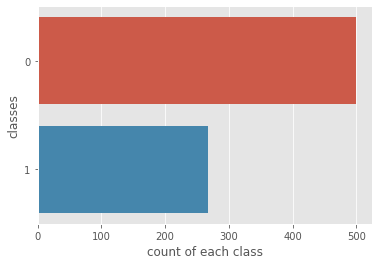

In [3]:
#Print class freq. through pandas 
print(df.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#basic statistic details about the data


df.describe(include="all")

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Basic Data Preparation

### Separate Train/Test sets


In [6]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [7]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


## The Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=4, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [9]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[129  21]
 [ 46  35]]


In [31]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5,100],
              'min_samples_split': [5,10,3],
              'min_samples_leaf': [2,1]}

In [32]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [33]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1918s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0600s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0541s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    1.4s finished


In [14]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.549616 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.492724 (0.019389) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.490970 (0.019376) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.527764 (0.071500) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.527764 (0.071500) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.530373 (0.068829) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.528526 (0.064466) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.515776 (0.045917) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.524829 (0.033862) with: {'criterion': 'gini', 'max_depth': 3, 

In [15]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [16]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [17]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.6233766233766234


In [18]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.66      0.59      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[125  25]
 [ 33  48]]


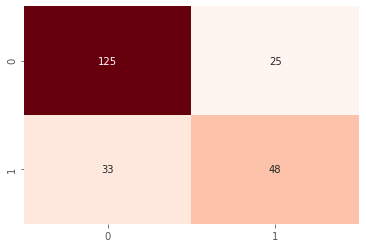

In [20]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

#annot=True to annotate cells fmt: format


### ROC Curve

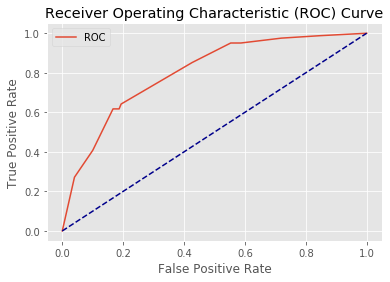

AUC: 0.80


In [21]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Plotting the tree 

In [22]:
X_train.columns.tolist()

['timespreg',
 'gluctol',
 'diaspb',
 'triceps',
 'insulin',
 'massindex',
 'pedigree',
 'age']

In [23]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)



|--- gluctol <= 142.50
|   |--- massindex <= 27.35
|   |   |--- diaspb <= 94.00
|   |   |   |--- gluctol <= 106.50
|   |   |   |   |--- class: 0
|   |   |   |--- gluctol >  106.50
|   |   |   |   |--- class: 0
|   |   |--- diaspb >  94.00
|   |   |   |--- class: 0
|   |--- massindex >  27.35
|   |   |--- gluctol <= 103.50
|   |   |   |--- age <= 25.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  25.50
|   |   |   |   |--- class: 0
|   |   |--- gluctol >  103.50
|   |   |   |--- pedigree <= 0.53
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.53
|   |   |   |   |--- class: 1
|--- gluctol >  142.50
|   |--- massindex <= 23.10
|   |   |--- class: 0
|   |--- massindex >  23.10
|   |   |--- gluctol <= 159.50
|   |   |   |--- age <= 24.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  24.50
|   |   |   |   |--- class: 1
|   |   |--- gluctol >  159.50
|   |   |   |--- age <= 59.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  59.50
|   |   |   |   |--- cla

[Text(171.585, 195.696, 'X[1] <= 142.5\ngini = 0.454\nsamples = 537\nvalue = [350, 187]'),
 Text(92.07000000000001, 152.208, 'X[5] <= 27.35\ngini = 0.353\nsamples = 411\nvalue = [317, 94]'),
 Text(50.220000000000006, 108.72, 'X[2] <= 94.0\ngini = 0.092\nsamples = 124\nvalue = [118, 6]'),
 Text(33.480000000000004, 65.232, 'X[1] <= 106.5\ngini = 0.079\nsamples = 122\nvalue = [117, 5]'),
 Text(16.740000000000002, 21.744, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(50.220000000000006, 21.744, 'gini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(66.96000000000001, 65.232, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 103.5\ngini = 0.425\nsamples = 287\nvalue = [199, 88]'),
 Text(100.44000000000001, 65.232, 'X[7] <= 25.5\ngini = 0.256\nsamples = 113\nvalue = [96, 17]'),
 Text(83.70000000000002, 21.744, 'gini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(117.18, 21.744, 'gini = 0.351\nsamples = 66\nvalue = [51, 15]'),
 Text(167.4000000000000

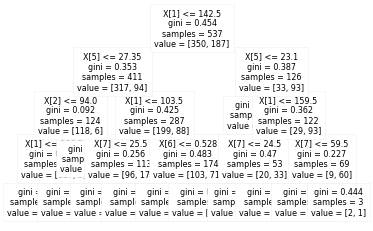

In [25]:
tree.plot_tree(model, fontsize=8)

In [27]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='decision_tree.dot', feature_names = X_test.columns.tolist())

In [28]:
!dot -Tpng decision_tree.dot -o decision_tree.png -Gdpi=600

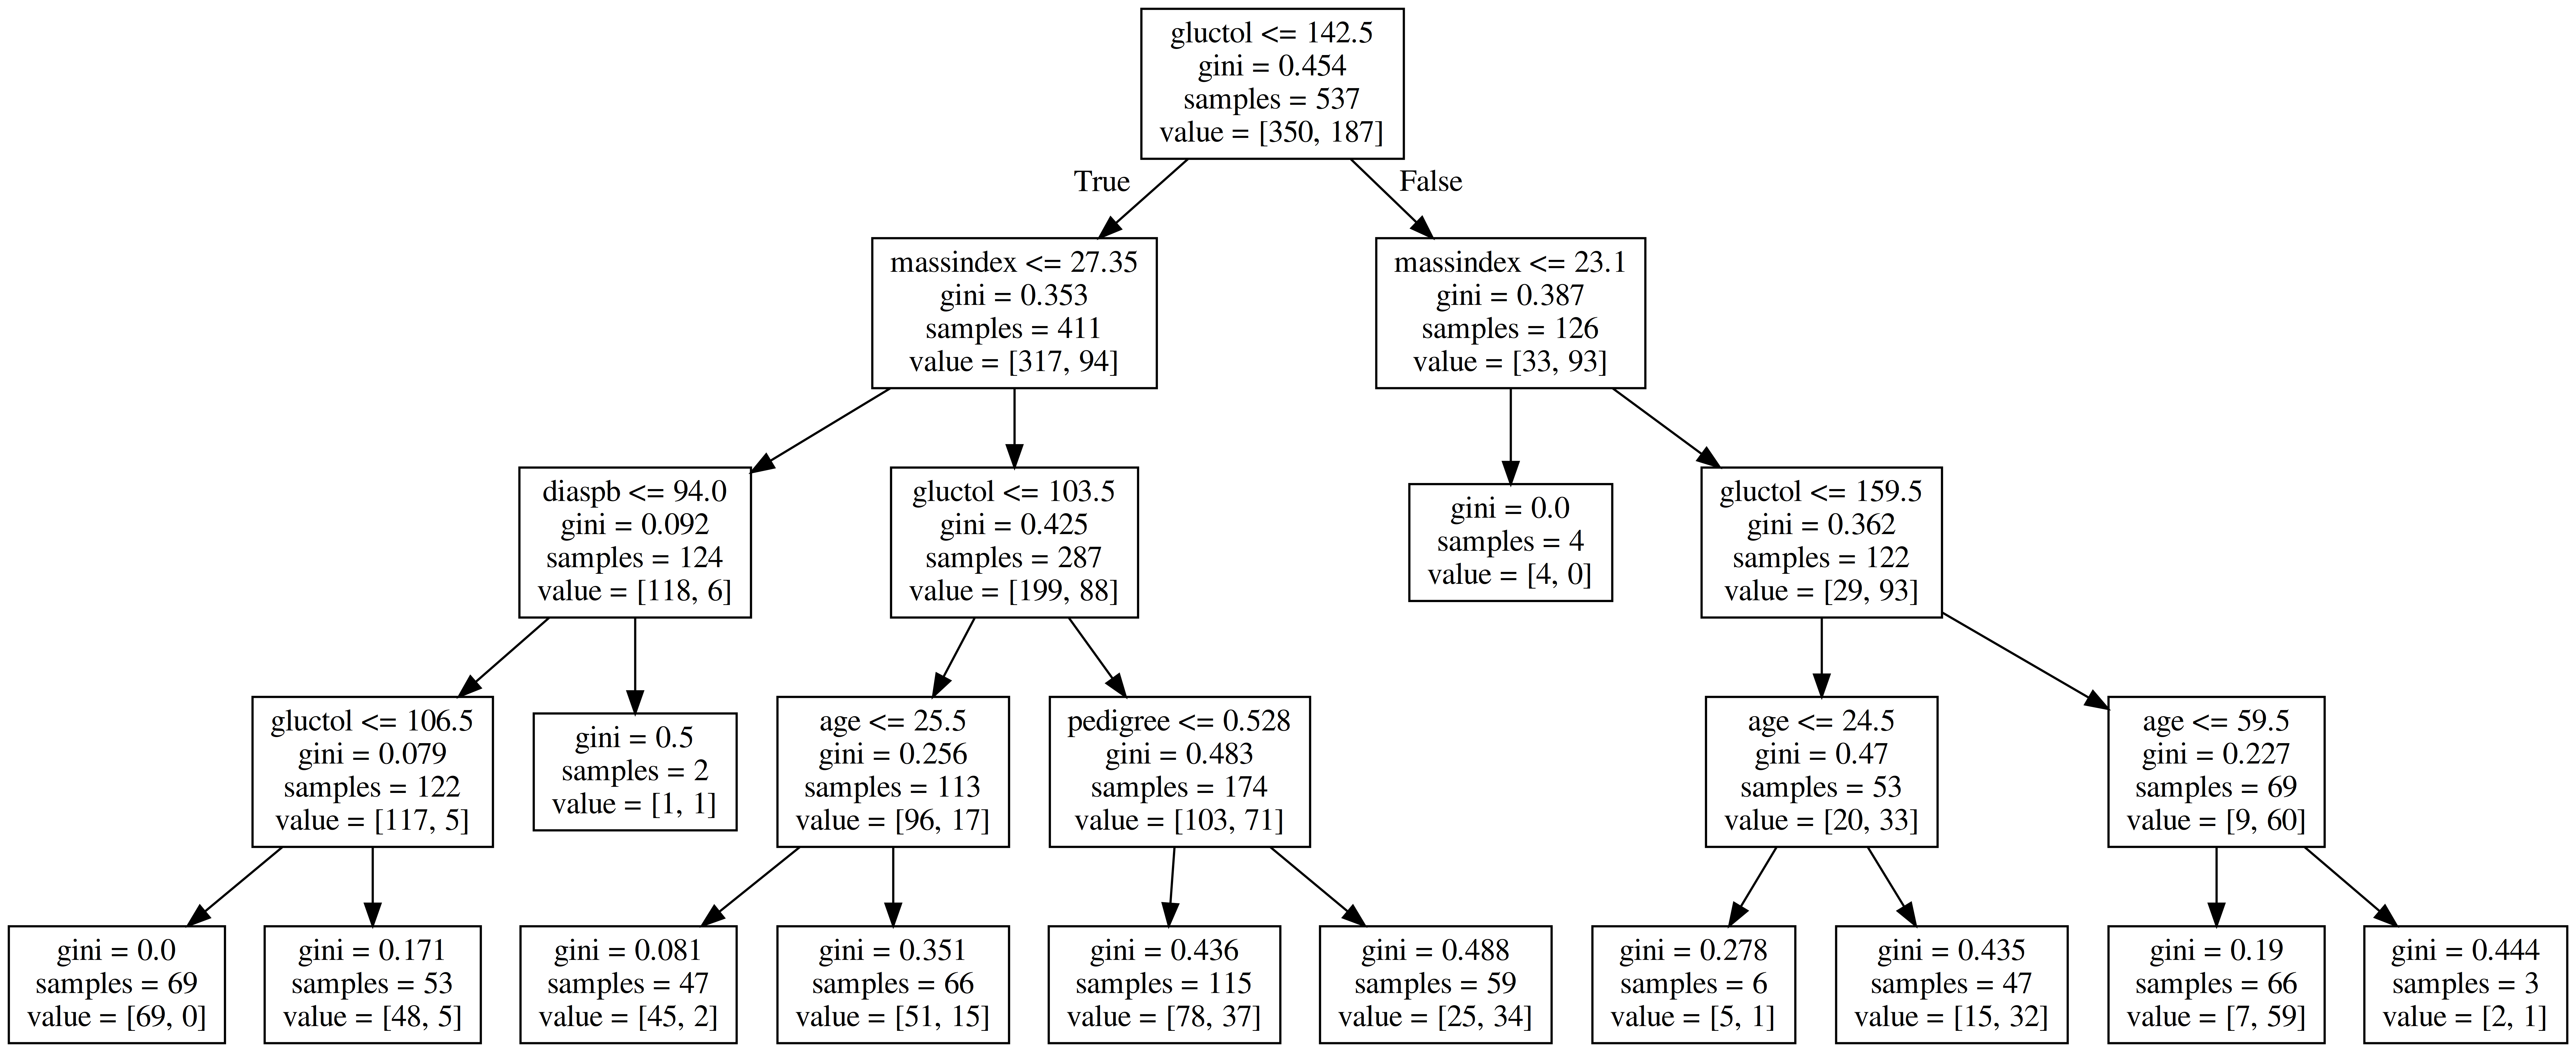

In [29]:
from IPython.display import Image
Image(filename = 'decision_tree.png')

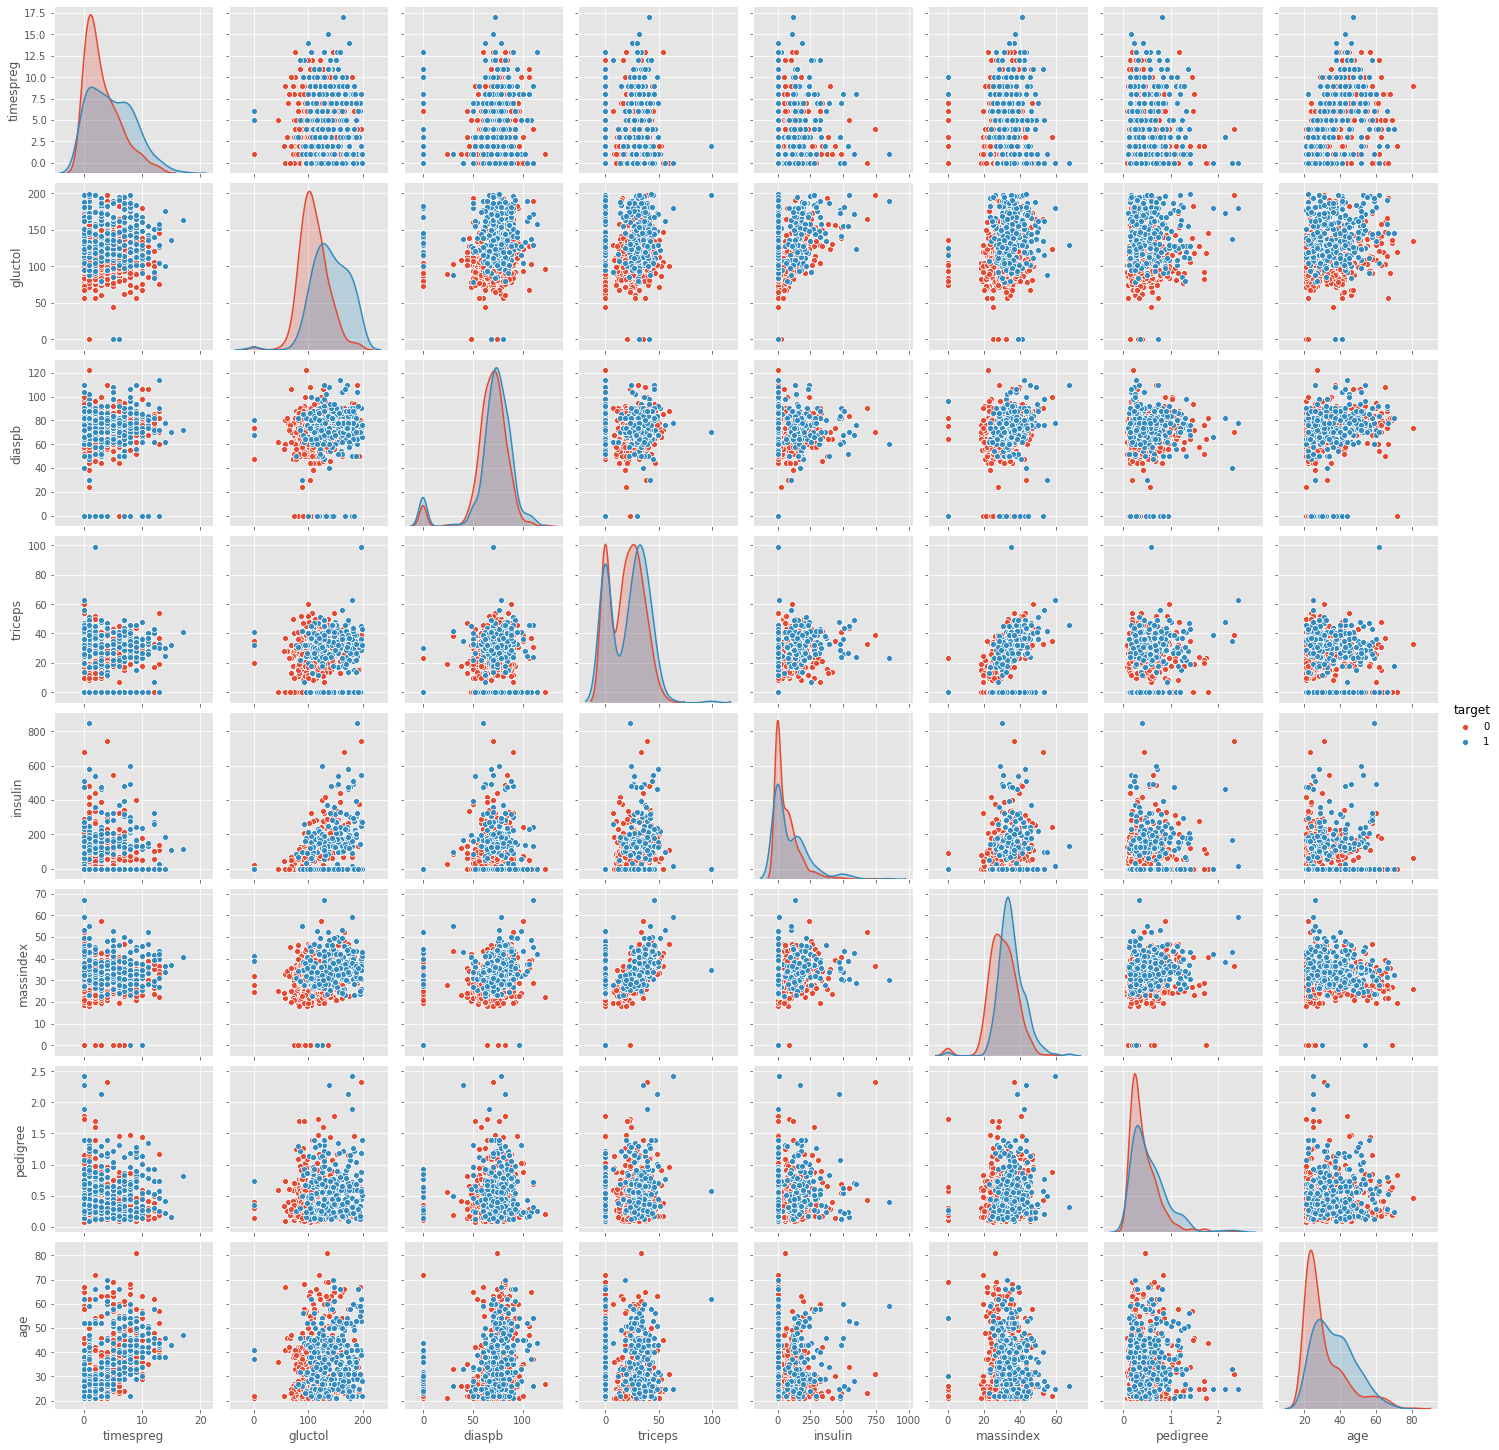

In [30]:
%matplotlib inline

import seaborn as sns
sns.pairplot(df,hue='target')